In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
# Variable -->Description

# UserID -->Unique ID of user
# Buy_ticket -->Buy ticket in next month
# Yearly_avg_view_on_travel_page -->Average yearly views on any travel related page by user
# preferred_device -->Through which device user preferred to do login
# total_likes_on_outstation_checkin_ given -->Total number of likes given by a user on out of station  checkings in last year
# yearly_avg_Outstation_checkins -->Average number of out of station check-in done by user
# member_in_family -->Total number of relationship mentioned by user in the  account
# preferred_location_type -->Preferred type of the location for travelling of user
# Yearly_avg_comment_on_travel_page -->Average yearly comments on any travel related page by user
# total_likes_on_outofstation_checki n_received -->Total number of likes received by a user on out of station  checkings in last year
# week_since_last_outstation_checkin -->Number of weeks since last out of station check-in update by  user
# following_company_page -->Weather the customer is following company page (Yes or No)
# montly_avg_comment_on_compan y_page -->Average monthly comments on company page by user
# working_flag -->Weather the customer is working or not
# travelling_network_rating -->Does user have close friends who also like travelling. 1 is  highs and 4 is lowest
# Adult_flag -->Weather the customer is adult or not
# Daily_Avg_mins_spend_on_traveling_page -->Average time spend on the company page by user on daily  basis

In [3]:
# df_mobile --> mobile data
# df_laptop --> laptop data
# X_mob --> X part of data from mobile data for training 
# Y_mob --> Y part of data from mobile data for training 
# X_train_mob --> X_train data after train_test_split
# X_test_mob --> X_test data after train_test_split
# Y_train_mob --> Y_train data after train_test_split
# Y_test_mob --> Y_test data after train_test_split
# X_train_mob_sc --> X_train data for mobile after standard scaler for only X_train part of data


In [4]:
df = pd.read_csv("E:/socialmedia.csv")
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [6]:
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [7]:
df.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [8]:
#checking null values 
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [9]:
null_percent = df.isnull().sum()/len(df)*100
null_percent

UserID                                          0.000000
Taken_product                                   0.000000
Yearly_avg_view_on_travel_page                  4.940476
preferred_device                                0.450680
total_likes_on_outstation_checkin_given         3.239796
yearly_avg_Outstation_checkins                  0.637755
member_in_family                                0.000000
preferred_location_type                         0.263605
Yearly_avg_comment_on_travel_page               1.751701
total_likes_on_outofstation_checkin_received    0.000000
week_since_last_outstation_checkin              0.000000
following_company_page                          0.875850
montly_avg_comment_on_company_page              0.000000
working_flag                                    0.000000
travelling_network_rating                       0.000000
Adult_flag                                      0.000000
Daily_Avg_mins_spend_on_traveling_page          0.000000
dtype: float64

In [10]:
#imputing the missing values using KNNImputer technique

from sklearn.impute import KNNImputer
knnimpute = KNNImputer(n_neighbors=3)
data_Impute = knnimpute.fit_transform(df[['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','Yearly_avg_comment_on_travel_page']])
data_Impute = pd.DataFrame(data_Impute, columns = ['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','Yearly_avg_comment_on_travel_page'])
data_Impute.isnull().sum()

Yearly_avg_view_on_travel_page             0
total_likes_on_outstation_checkin_given    0
Yearly_avg_comment_on_travel_page          0
dtype: int64

In [11]:
#dropping the missing value columns from the original dataset

df.drop(['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','Yearly_avg_comment_on_travel_page'],axis = 1, inplace = True)

# merging the Imputed columns to the original dataset
df_new = pd.concat([df, data_Impute], axis=1)
df_new.dropna(axis=0,inplace=True)
df_new.dropna(axis=1,inplace=True)
df_new.columns
df=df_new.iloc[:,:]

# Data Cleaning

In [12]:
#converted values in preferred device column
df['preferred_device'].replace({"iOS and Android":"Mobile", "iOS":"Mobile", "ANDROID":"Mobile", "Android":"Mobile", "Android OS":"Mobile", "Other":"Mobile", "Others":"Mobile", "Tab":"Mobile"}, inplace = True)
#df['preferred_device'].unique()

#Removing * from column- 'yearly_avg_Outstation_checkins'
df= df[df['yearly_avg_Outstation_checkins'] != '*']
#df['yearly_avg_Outstation_checkins'].unique()

#Replacing Three to '3' in column- 'member_in_family'
df['member_in_family'].replace({"Three":"3"},inplace = True)
#df['member_in_family'].unique()

#Replacing Values in column- 'preferred_location_type'
df['preferred_location_type'].replace({"Tour  Travel":"Tour and Travel"}, inplace = True)
#df['preferred_location_type'].unique()

#Replacing Yes and No to 1 and 0 in column- 'following_company_page'
df['following_company_page'].replace({"Yes":"1", "No":"0"}, inplace = True)
#df['following_company_page'].unique()

#Round off values in column- 'Yearly_avg_view_on_travel_page'
df.Yearly_avg_view_on_travel_page = df.Yearly_avg_view_on_travel_page.round()
#df['Yearly_avg_view_on_travel_page'].unique()

#Round off values in column- 'Yearly_avg_comment_on_travel_page'
df.Yearly_avg_comment_on_travel_page = df.Yearly_avg_comment_on_travel_page.round()
#df['Yearly_avg_comment_on_travel_page'].unique()

#changing adult flag 0 to 0 and others to 1
df['Adult_flag'].replace({2:1,3:1}, inplace = True)
#df['Adult_flag'].unique()

In [13]:
# import numpy
# df2=df.copy()
# cols_iqr = df2[['total_likes_on_outstation_checkin_given','Yearly_avg_comment_on_travel_page','total_likes_on_outofstation_checkin_received','montly_avg_comment_on_company_page','Daily_Avg_mins_spend_on_traveling_page']]
# for cols in cols_iqr:

#     Q1 = df[cols].quantile(0.25)
#     Q3 = df[cols].quantile(0.75)

#     IQR = Q3-Q1
#     lower_limit = Q1 - 1.5*IQR
#     upper_limit = Q1 + 1.5*IQR


#     df2 = df2[(df2[cols]>lower_limit)&(df2[cols]<upper_limit)]

# df2['total_likes_on_outstation_checkin_given'].describe()
# df=df2.copy()
# df['total_likes_on_outstation_checkin_given'].describe()

# EDA

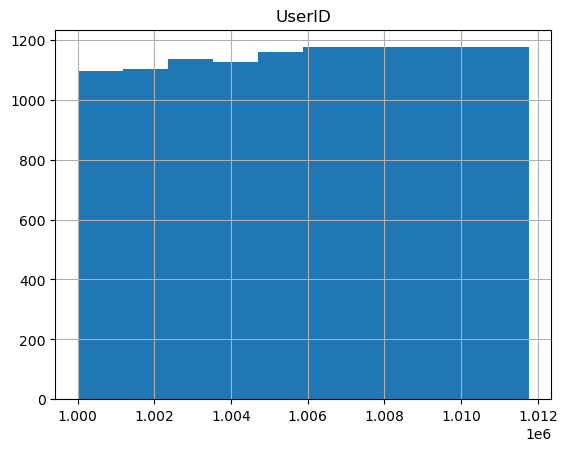

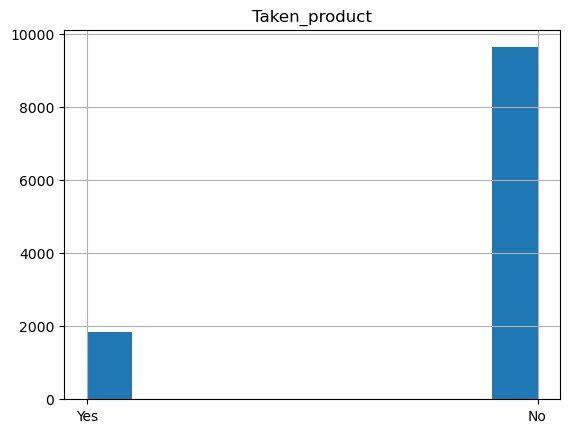

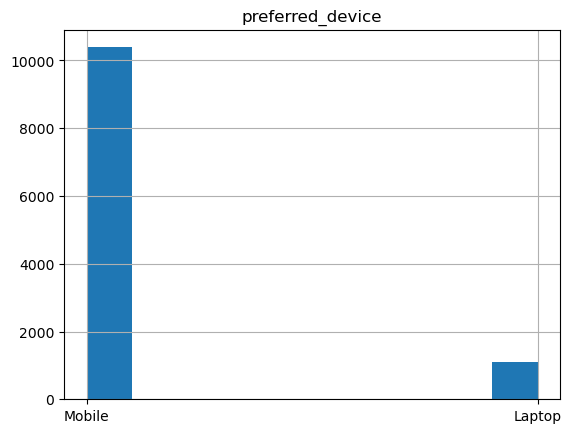

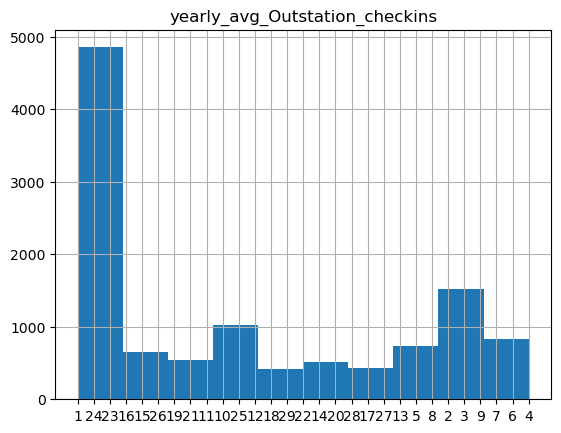

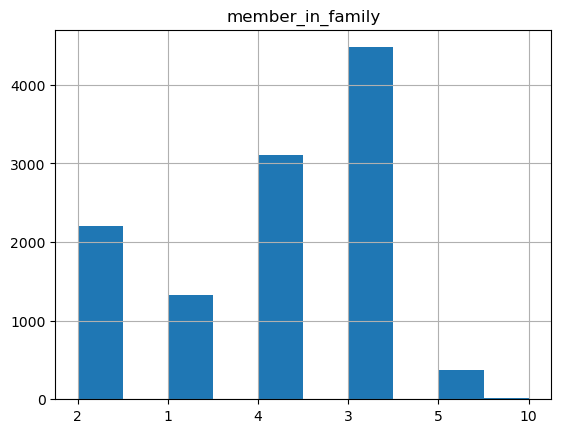

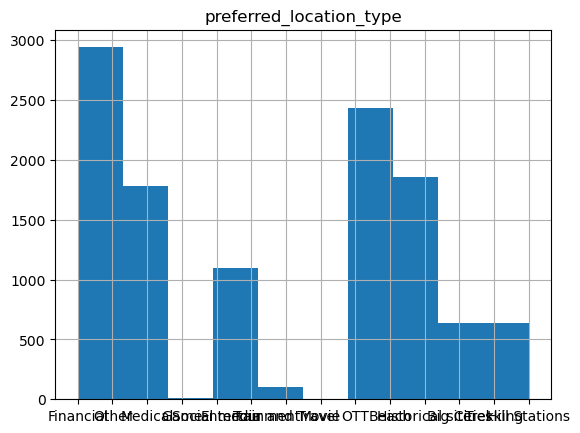

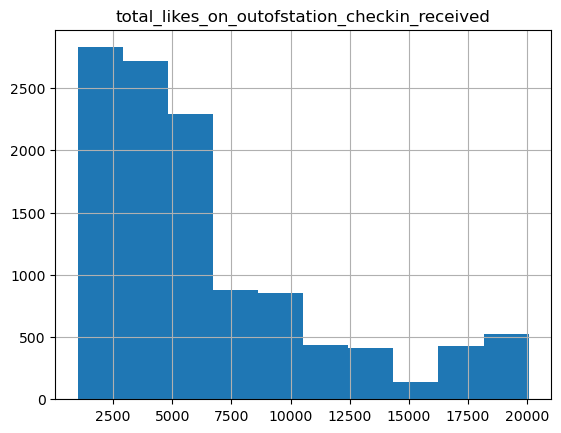

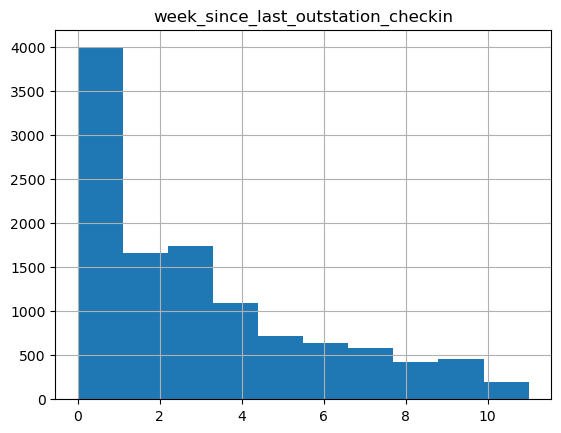

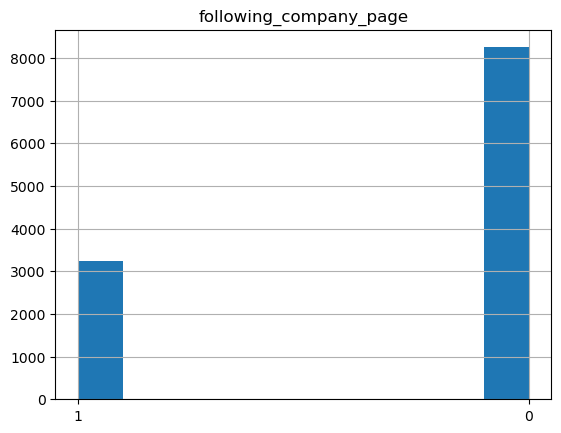

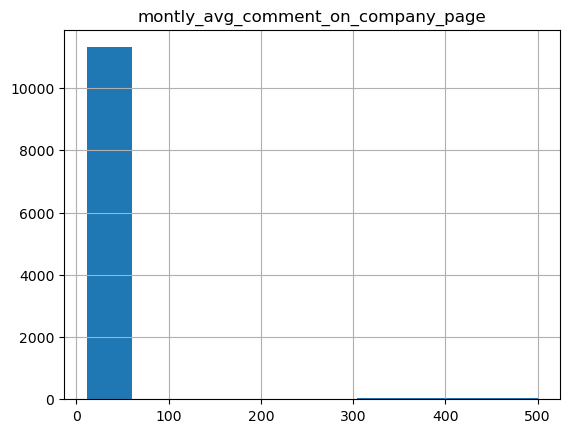

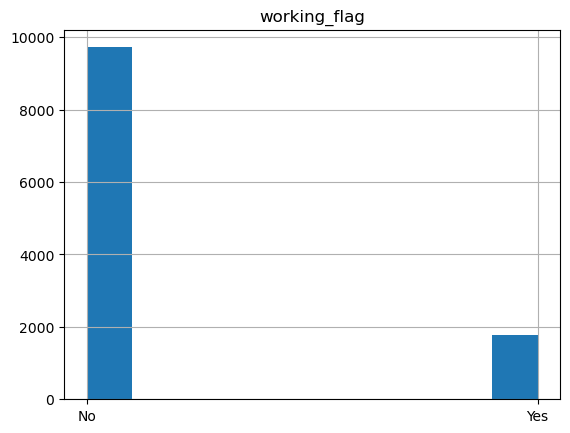

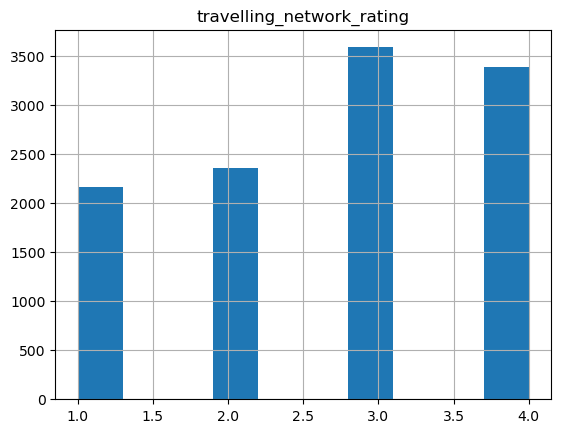

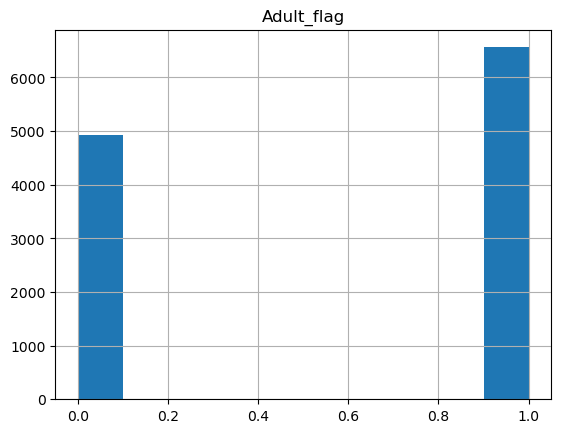

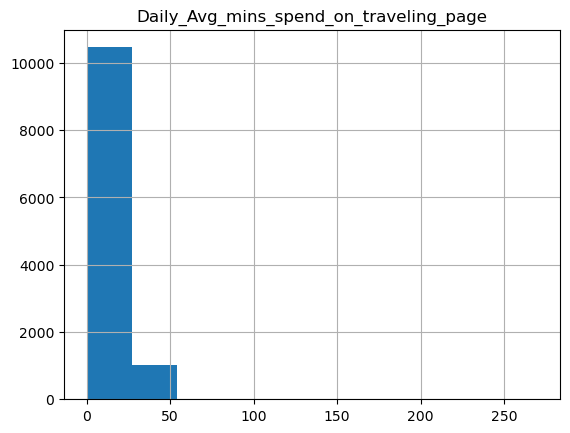

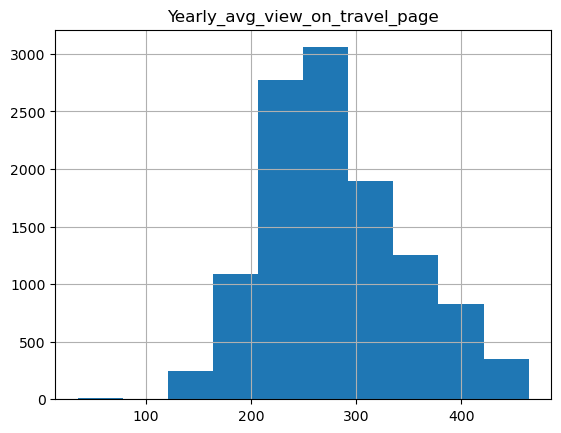

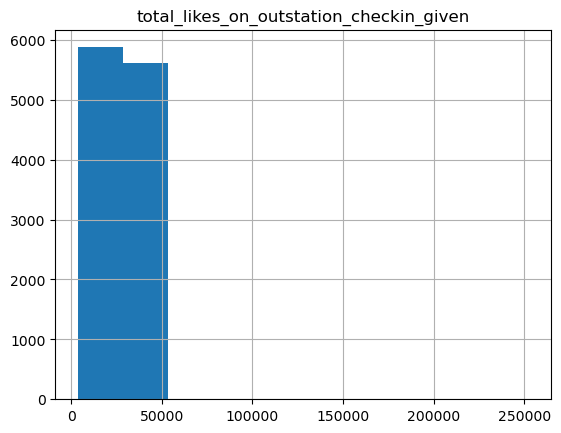

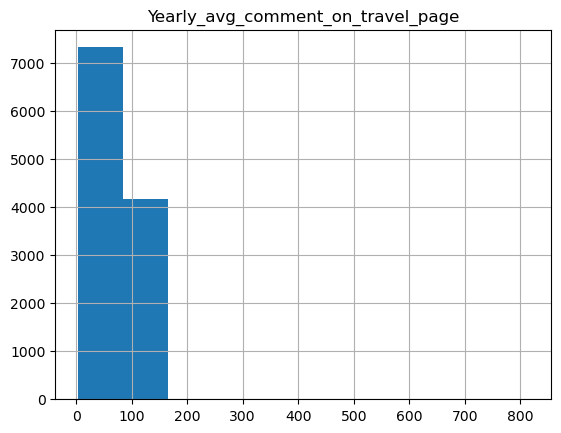

In [14]:
import matplotlib.pyplot as plt

for column in df:
    plt.figure()
    df[column].hist()
    plt.title(column)

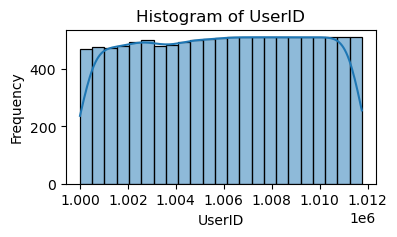

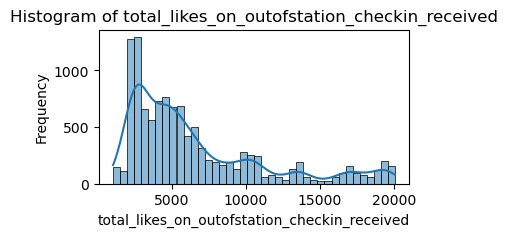

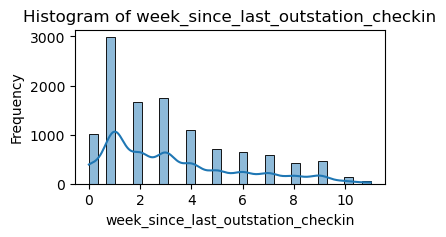

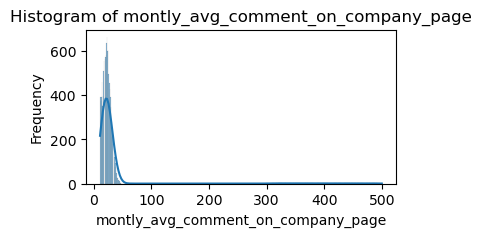

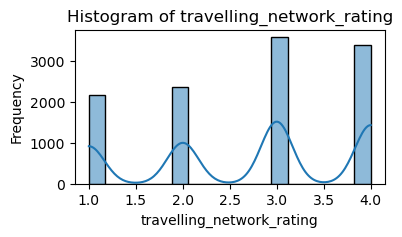

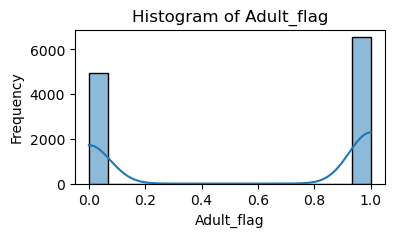

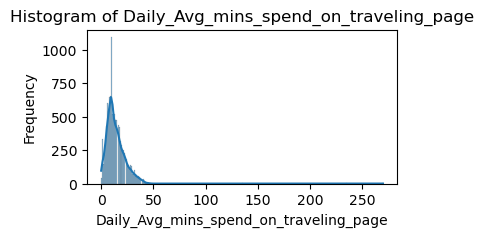

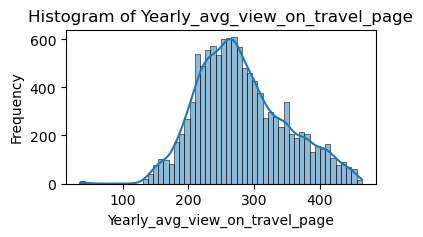

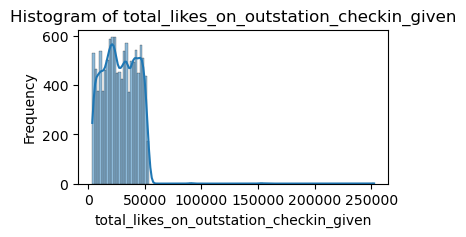

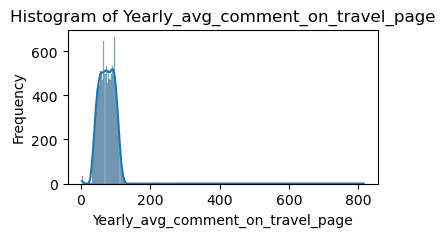

In [15]:
#univariate analysis for fiels with numerical data type
import seaborn as sns 
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(4,2))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

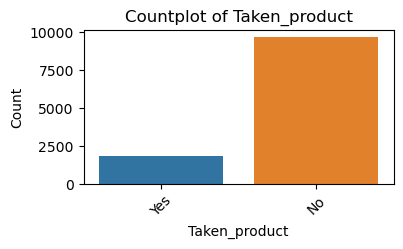

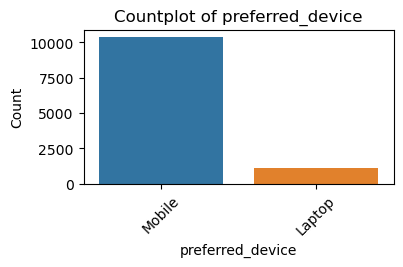

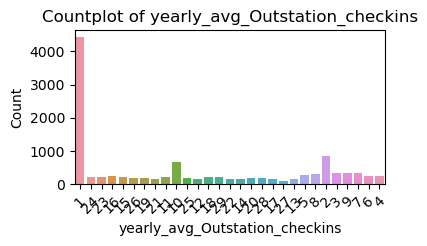

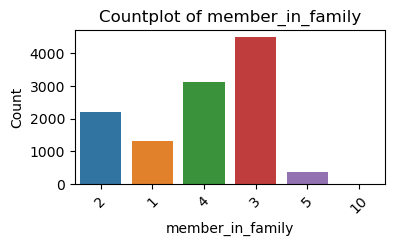

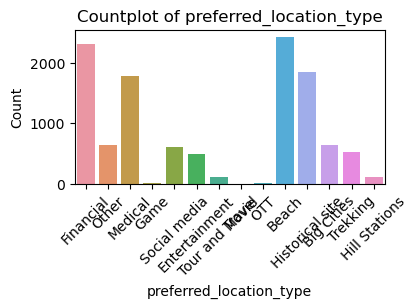

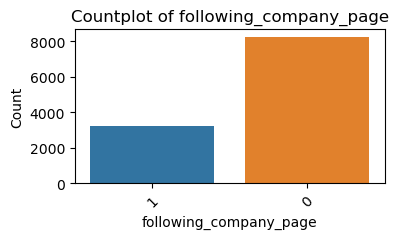

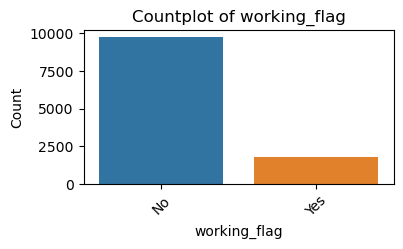

In [16]:
#univariate analysis for fiels with object data type
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(4,2))
        sns.countplot(data=df, x=column)
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

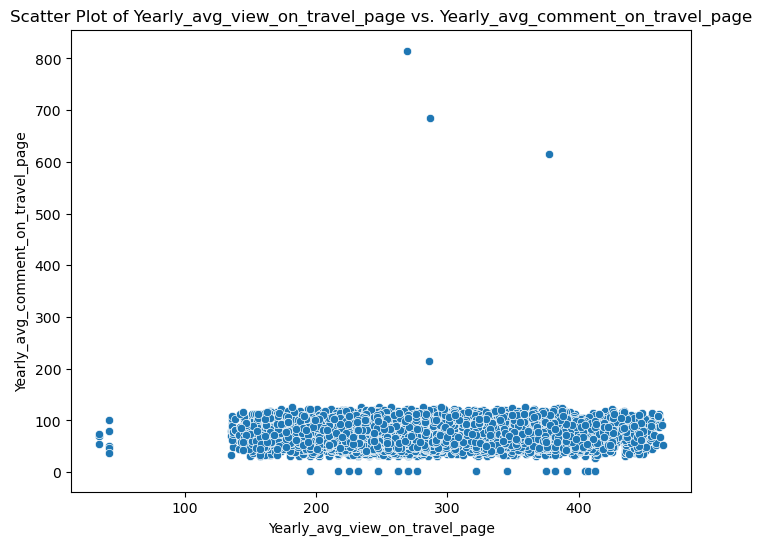

Pearson Correlation Coefficient: 0.04


In [17]:
import numpy as np
x = df['Yearly_avg_view_on_travel_page']
y = df['Yearly_avg_comment_on_travel_page']

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y)
plt.title('Scatter Plot of Yearly_avg_view_on_travel_page vs. Yearly_avg_comment_on_travel_page')
plt.xlabel('Yearly_avg_view_on_travel_page')
plt.ylabel('Yearly_avg_comment_on_travel_page')
plt.show()
correlation = np.corrcoef(x, y)[0, 1]
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

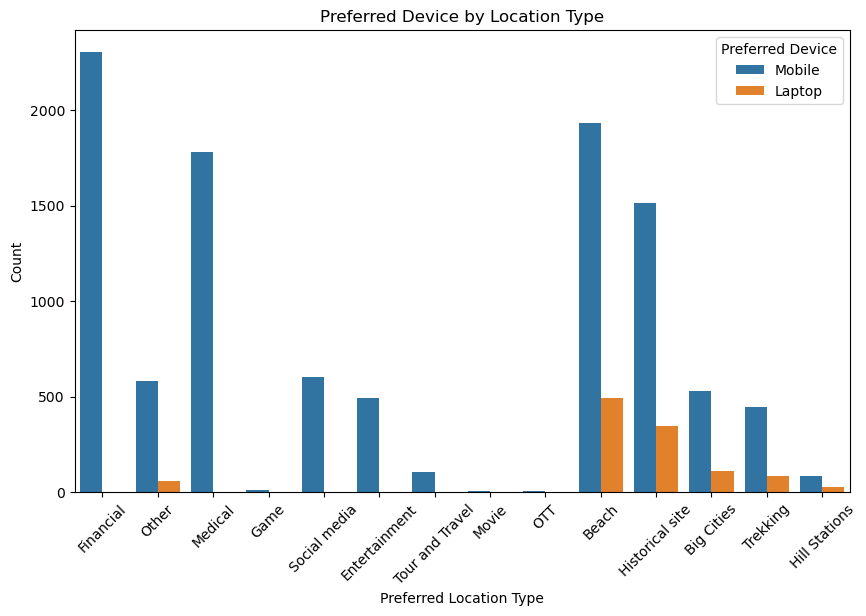

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='preferred_location_type', hue='preferred_device')
plt.title('Preferred Device by Location Type')
plt.xlabel('Preferred Location Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Preferred Device')
plt.show()

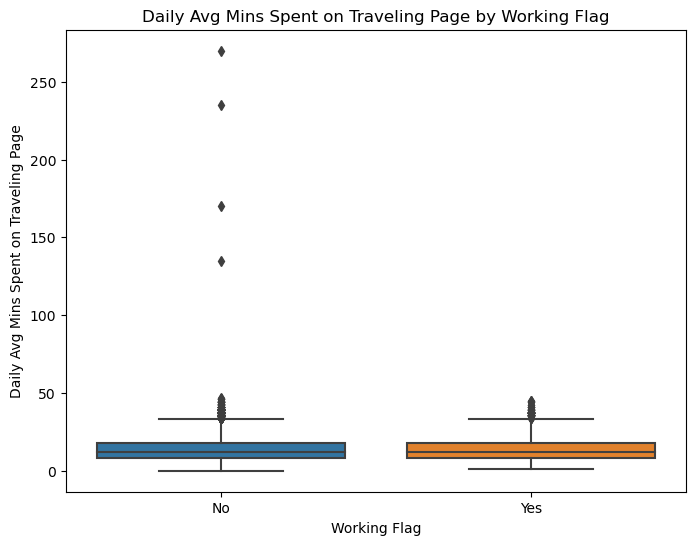

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='working_flag', y='Daily_Avg_mins_spend_on_traveling_page')
plt.title('Daily Avg Mins Spent on Traveling Page by Working Flag')
plt.xlabel('Working Flag')
plt.ylabel('Daily Avg Mins Spent on Traveling Page')
plt.show()

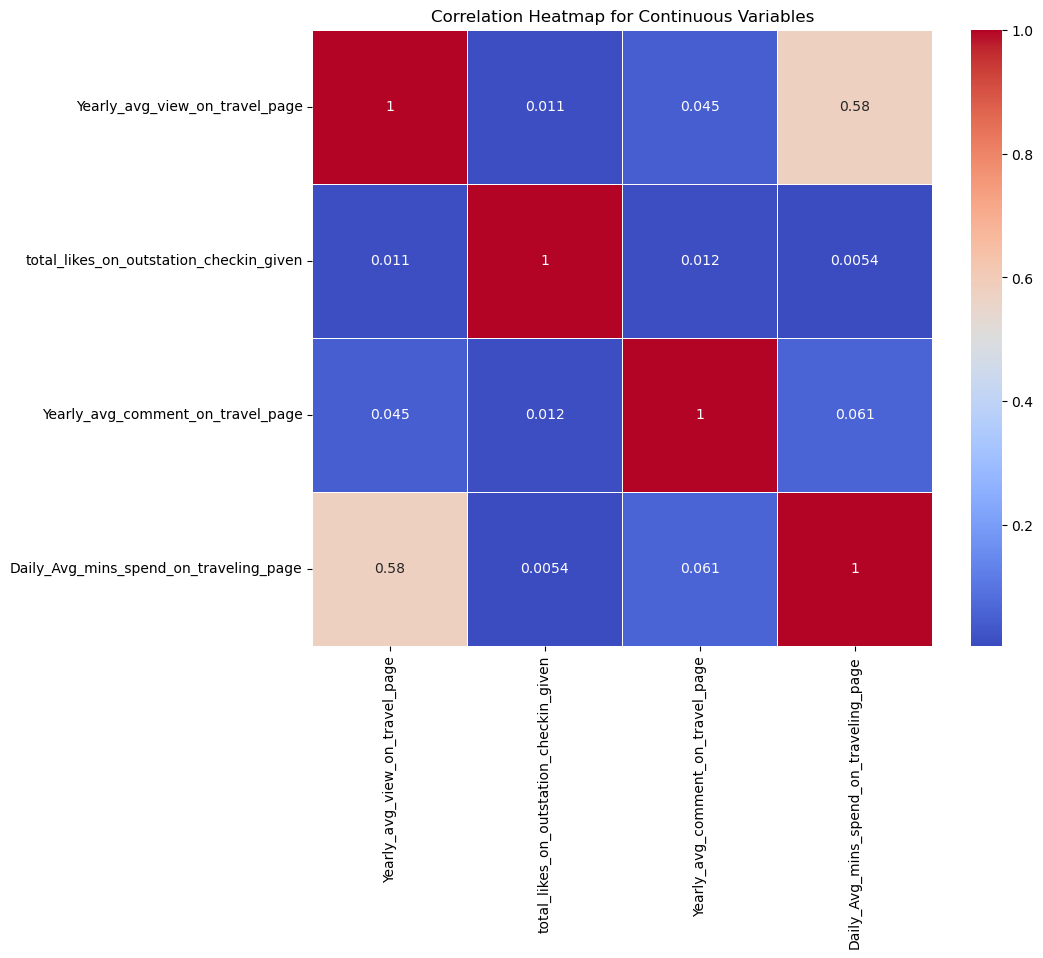

In [20]:
continuous_vars = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                   'Yearly_avg_comment_on_travel_page', 'Daily_Avg_mins_spend_on_traveling_page']

# Calculate the correlation matrix
correlation_matrix = df[continuous_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()

In [21]:
#splitting the dataset on the basis of preferred device type 
df_mobile = df[df['preferred_device'] == 'Mobile']
df_laptop = df[df['preferred_device'] == 'Laptop']

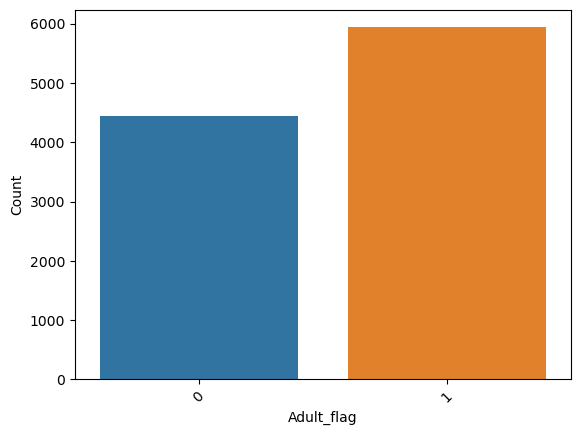

In [22]:
sns.countplot(data=df_mobile, x='Adult_flag')
plt.xlabel('Adult_flag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

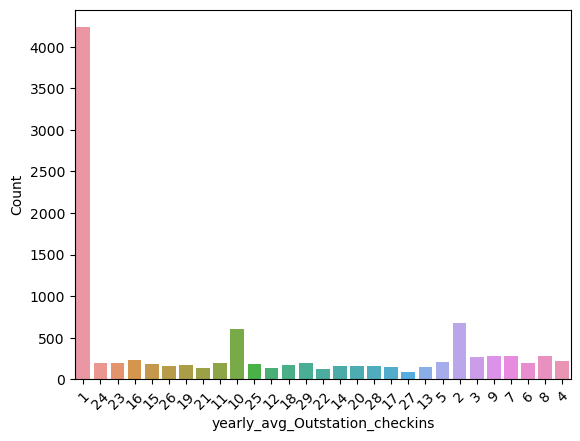

In [23]:
sns.countplot(data=df_mobile, x='yearly_avg_Outstation_checkins')
plt.xlabel('yearly_avg_Outstation_checkins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

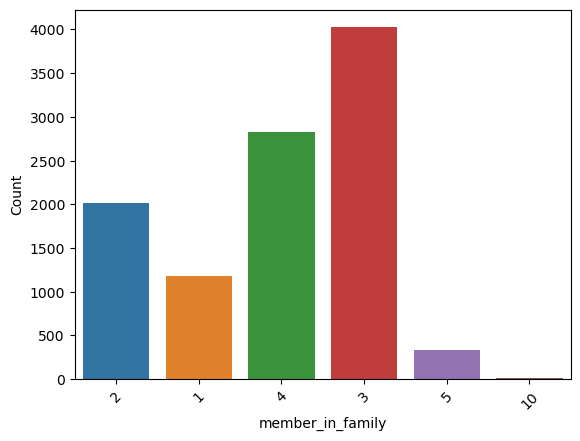

In [24]:
#member_in_family
sns.countplot(data=df_mobile, x='member_in_family')
plt.xlabel('member_in_family')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Adult_flag', ylabel='Taken_product'>

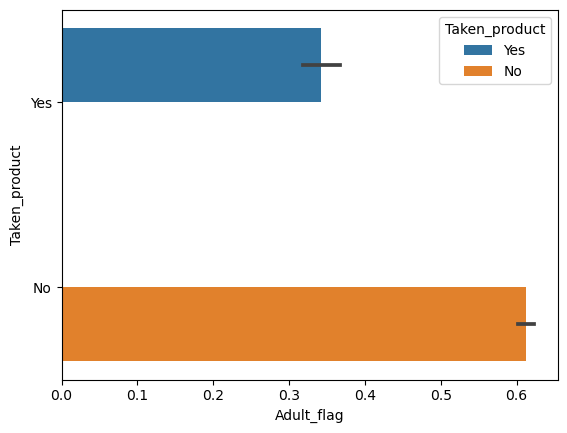

In [25]:
sns.barplot(x ='Adult_flag', y ='Taken_product', data = df_mobile, hue='Taken_product')

C:\Users\chandrasekar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


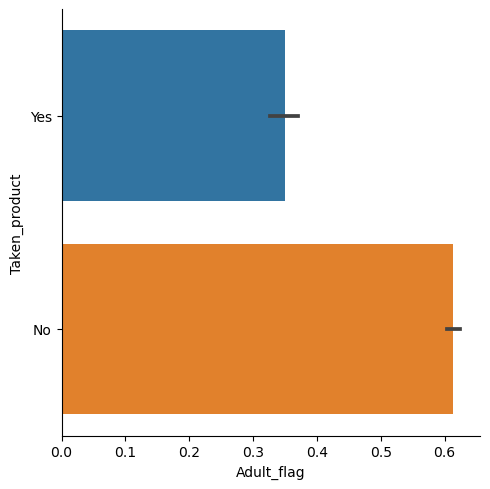

In [26]:
sns.catplot(data=df, x="Adult_flag", y="Taken_product", kind="bar")

<Axes: xlabel='Taken_product', ylabel='Daily_Avg_mins_spend_on_traveling_page'>

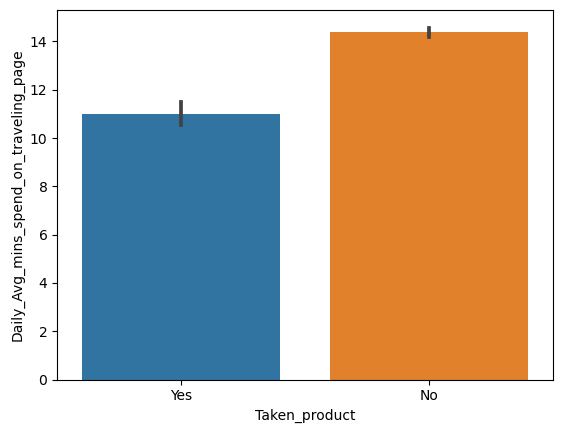

In [27]:
sns.barplot(x ='Taken_product', y ='Daily_Avg_mins_spend_on_traveling_page', data = df_mobile)

<Axes: xlabel='member_in_family', ylabel='Taken_product'>

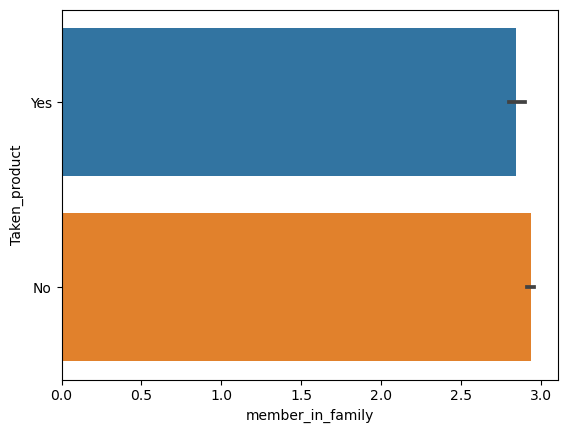

In [28]:
sns.barplot(x=df_mobile['member_in_family'].astype(int), y=df_mobile['Taken_product'])

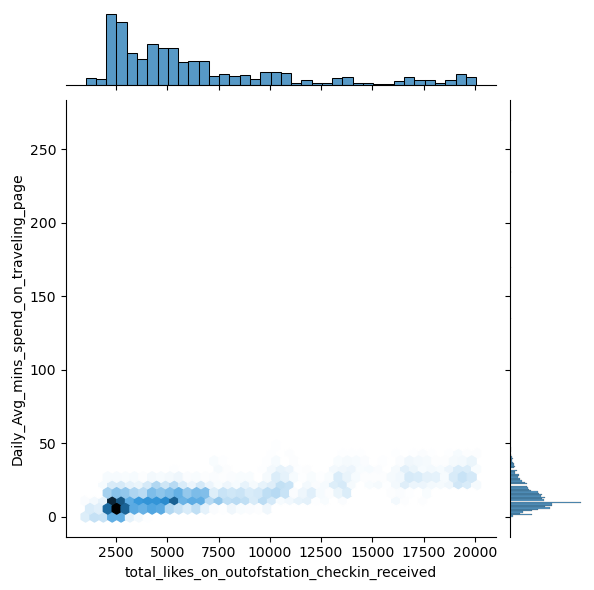

In [29]:
sns.jointplot(x='total_likes_on_outofstation_checkin_received', y='Daily_Avg_mins_spend_on_traveling_page',data=df_mobile, kind= 'hex')

<Axes: >

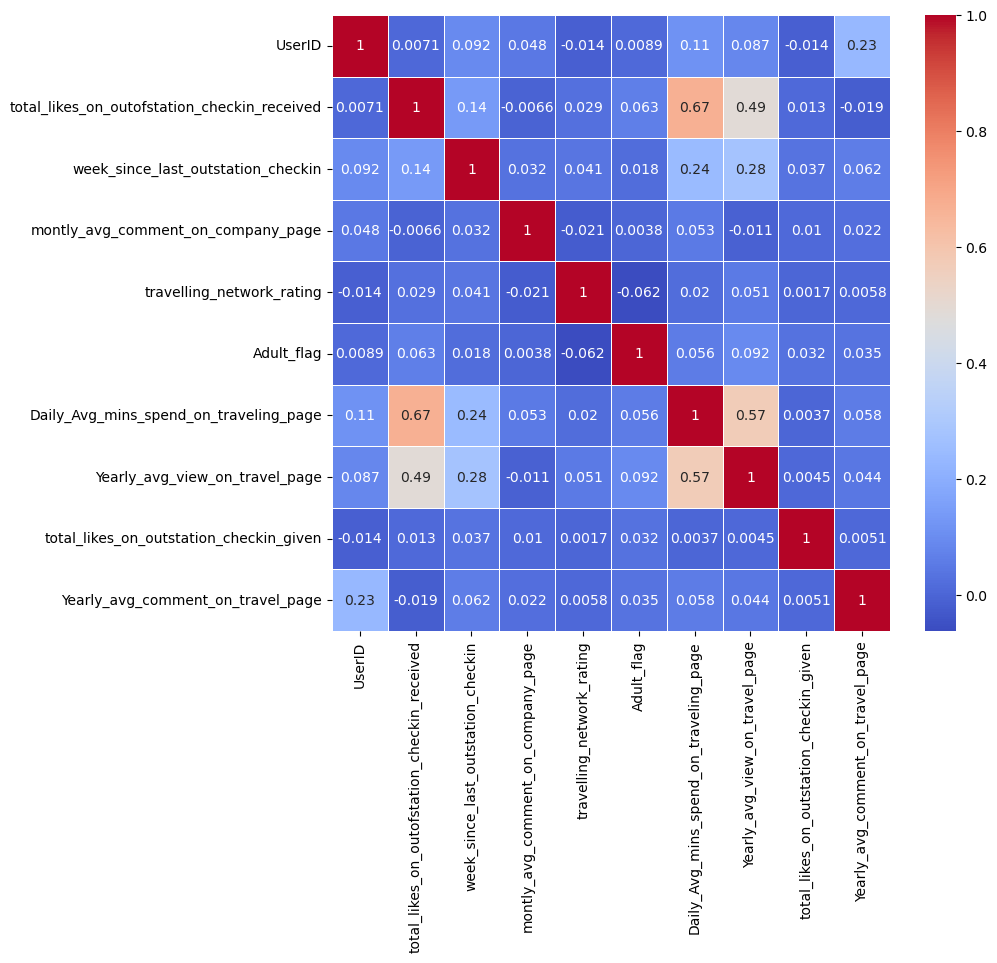

In [30]:
df_numerical_features = df_mobile.select_dtypes(exclude='object')
Corr_mob = df_numerical_features.corr()
Corr = df_numerical_features.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(Corr, annot=True, cmap='coolwarm', linewidths=0.5)

In [31]:
#Label encoding mobile dataset

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_mobile['preferred_location_type'] = label_encoder.fit_transform(df_mobile['preferred_location_type'])
df_mobile['preferred_device'] = label_encoder.fit_transform(df_mobile['preferred_device'])
df_mobile['Taken_product'] = label_encoder.fit_transform(df_mobile['Taken_product'])
df_mobile['working_flag'] = label_encoder.fit_transform(df_mobile['working_flag'])

df_mobile['Taken_product'].value_counts()

C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\847278239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile['preferred_location_type'] = label_encoder.fit_transform(df_mobile['preferred_location_type'])
C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\847278239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile['preferred_device'] = label_encoder.fit_transform(df_mobile['preferred_device'])
C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\847278239.py:7: Setti

Taken_product
0    8810
1    1580
Name: count, dtype: int64

In [32]:
#We do not need the preferred device column as we have only mobile

df_mobile.drop(['preferred_device'], axis = 1, inplace = True)
df_mobile.drop(['UserID'], axis = 1, inplace = True)

C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\845669271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile.drop(['preferred_device'], axis = 1, inplace = True)
C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\845669271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile.drop(['UserID'], axis = 1, inplace = True)


In [33]:
#Locking x and y for train test split

X_mob = df_mobile.iloc[:,1:]
Y_mob = df_mobile.iloc[:,:1]

In [34]:
from sklearn.model_selection import train_test_split
X_train_mob,X_test_mob,Y_train_mob,Y_test_mob=train_test_split(X_mob,Y_mob,test_size=0.2,random_state=30)

In [35]:
from sklearn.preprocessing import StandardScaler
cols = X_train_mob.columns
scaler=StandardScaler()
X_train_mob_sc=pd.DataFrame(scaler.fit_transform(X_train_mob),columns=cols)
X_train_mob_sc

,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page
0,-0.134562,0.068713,0.315358,2.642774,-0.463531,1.609984,-0.076192,-0.426644,1.195239,0.864264,1.797319,0.808566,1.237020,-1.101332
1,-0.592629,-0.889580,0.315358,-0.375824,0.299565,-0.621124,0.122898,2.343875,-1.581921,0.864264,-0.435996,1.342512,-1.293377,-1.059848
2,-0.821662,-0.889580,-0.477360,0.977217,0.681112,-0.621124,-0.135918,-0.426644,1.195239,-1.157054,0.345664,-0.570793,0.520861,-0.976880
3,-0.821662,-1.847872,0.579597,-0.380466,-0.463531,1.609984,-0.076192,-0.426644,1.195239,-1.157054,0.345664,-0.911925,1.374029,0.972858
4,-0.821662,0.068713,-0.741599,0.787302,0.299565,1.609984,-0.016465,2.343875,0.269519,0.864264,1.015659,-0.140670,-1.067870,0.309117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,-0.821662,-0.889580,0.579597,1.753970,1.062660,-0.621124,-0.215554,-0.426644,0.269519,0.864264,1.573988,1.757803,1.389345,-0.810945
8308,1.926736,-0.889580,-0.477360,0.915600,-0.081983,-0.621124,-0.155827,2.343875,-0.656201,0.864264,-0.100999,0.170798,1.650818,-0.147205
8309,-0.821662,0.068713,-0.477360,1.082937,2.207304,-0.621124,-0.295190,-0.426644,-1.581921,0.864264,-0.435996,-0.155502,-0.915407,-0.479075
8310,-0.821662,0.068713,0.579597,-0.877622,-0.463531,-0.621124,-0.155827,-0.426644,0.269519,0.864264,-0.212665,-0.585625,0.627239,0.350601


# Logistic Regression - Mobile 

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_mob_sc,Y_train_mob)
LR.score(X_test_mob,Y_test_mob)

C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8484119345524542

In [37]:
LR_mob_pred = LR.predict(X_test_mob)

from sklearn.metrics import confusion_matrix
LR_mob_cm = confusion_matrix(Y_test_mob, LR_mob_pred)
print(LR_mob_cm)

[[1763    0]
 [ 315    0]]


In [38]:
from sklearn.metrics import classification_report
LR_mob_CR = classification_report(Y_test_mob, LR_mob_pred)
print(LR_mob_CR)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1763
           1       0.00      0.00      0.00       315

    accuracy                           0.85      2078
   macro avg       0.42      0.50      0.46      2078
weighted avg       0.72      0.85      0.78      2078



C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN mobile 


In [39]:
from sklearn.neighbors import KNeighborsClassifier 
k=KNeighborsClassifier(n_neighbors=5)
k.fit(X_train_mob_sc,Y_train_mob)
k.score(X_test_mob,Y_test_mob)

C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8484119345524542

In [40]:
k_mob_pred = k.predict(X_test_mob)
#rf.oob_score_
accuracy_score(Y_test_mob, k_mob_pred)
k_mob_CM = confusion_matrix(Y_test_mob,k_mob_pred)
k_mob_CM


array([[1763,    0],
       [ 315,    0]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
k_mob_CR=classification_report(Y_test_mob,k_mob_pred)
print(k_mob_CR)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1763
           1       0.00      0.00      0.00       315

    accuracy                           0.85      2078
   macro avg       0.42      0.50      0.46      2078
weighted avg       0.72      0.85      0.78      2078



C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Mobile

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, oob_score = True)
rf.fit(X_train_mob_sc,Y_train_mob)
#rf.score(X_test_mob,Y_test_mob)

C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\2827056649.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_mob_sc,Y_train_mob)


RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score

RF_mob_pred = rf.predict(X_test_mob).round()
#rf.oob_score_
accuracy_score(Y_test_mob, RF_mob_pred)

0.7305101058710298

In [44]:
RF_mob_CM = confusion_matrix(Y_test_mob,RF_mob_pred)
RF_mob_CM


array([[1345,  418],
       [ 142,  173]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
RF_mob_CR=classification_report(Y_test_mob,RF_mob_pred )
print(RF_mob_CR)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1763
           1       0.29      0.55      0.38       315

    accuracy                           0.73      2078
   macro avg       0.60      0.66      0.60      2078
weighted avg       0.81      0.73      0.76      2078



In [46]:
from sklearn.svm import SVC
svc = SVC(random_state=101)
svc.fit(X_train_mob_sc, Y_train_mob)

C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=101)

In [47]:
SVM_mob_pred = svc.predict(X_test_mob)
print(svc.score(X_test_mob,Y_test_mob))

0.8484119345524542


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
svm_cr=classification_report(Y_test_mob,SVM_mob_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1763
           1       0.00      0.00      0.00       315

    accuracy                           0.85      2078
   macro avg       0.42      0.50      0.46      2078
weighted avg       0.72      0.85      0.78      2078



C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ------------S M O T E-------------

In [49]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_mob_smote,Y_mob_smote = smote.fit_resample(X_train_mob_sc,Y_train_mob)

Y_mob_smote.value_counts()

Taken_product
0                7047
1                7047
Name: count, dtype: int64

In [50]:
Y_train_mob.value_counts()


Taken_product
0                7047
1                1265
Name: count, dtype: int64

In [51]:
#train test split

from sklearn.model_selection import train_test_split
(X_train_mob_sm, X_test_mob_sm, Y_train_mob_sm, Y_test_mob_sm) = train_test_split(X_mob_smote, Y_mob_smote)

# Logistic Regression- Mobile after SMOTE

In [52]:
#using logistic regression after SMOTE

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_mob_sm, Y_train_mob_sm)
LR.score(X_test_mob_sm,Y_test_mob_sm)

C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7238933030646992

In [53]:
LR_mob_pred_sm = LR.predict(X_test_mob_sm).round()

from sklearn.metrics import confusion_matrix
LR_mob_CM_sm = confusion_matrix(Y_test_mob_sm, LR_mob_pred_sm)
print(LR_mob_CM_sm)

[[1267  530]
 [ 443 1284]]


In [54]:
from sklearn.metrics import classification_report
LR_mob_CR_sm = classification_report(Y_test_mob_sm, LR_mob_pred_sm)
print(LR_mob_CR_sm)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1797
           1       0.71      0.74      0.73      1727

    accuracy                           0.72      3524
   macro avg       0.72      0.72      0.72      3524
weighted avg       0.72      0.72      0.72      3524



# Random Forest - Mobile after SMOTE

In [55]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42, oob_score = True)
RF.fit(X_train_mob_sm,Y_train_mob_sm)
#rf.score(X_test_mob,Y_test_mob)

C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\644775720.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train_mob_sm,Y_train_mob_sm)


RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=42)

In [56]:
from sklearn.metrics import accuracy_score

RF_mob_pred_sm = RF.predict(X_test_mob_sm).round()
#rf.oob_score_
accuracy_score(Y_test_mob_sm, RF_mob_pred_sm)

0.9866628830874007

In [57]:
RF_mob_CM_sm = confusion_matrix(Y_test_mob_sm,RF_mob_pred_sm)
RF_mob_CM_sm


array([[1767,   30],
       [  17, 1710]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
RF_mob_CR_sm=classification_report(Y_test_mob_sm,RF_mob_pred_sm)
print(RF_mob_CR_sm)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1797
           1       0.98      0.99      0.99      1727

    accuracy                           0.99      3524
   macro avg       0.99      0.99      0.99      3524
weighted avg       0.99      0.99      0.99      3524



# ___ Laptop ____

In [59]:
#Label encoding mobile dataset

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_laptop['preferred_location_type'] = label_encoder.fit_transform(df_laptop['preferred_location_type'])
df_laptop['preferred_device'] = label_encoder.fit_transform(df_laptop['preferred_device'])
df_laptop['Taken_product'] = label_encoder.fit_transform(df_laptop['Taken_product'])
df_laptop['working_flag'] = label_encoder.fit_transform(df_laptop['working_flag'])

df_laptop['Taken_product'].value_counts()

C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\2652142959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop['preferred_location_type'] = label_encoder.fit_transform(df_laptop['preferred_location_type'])
C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\2652142959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop['preferred_device'] = label_encoder.fit_transform(df_laptop['preferred_device'])
C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\2652142959.py:7: Se

Taken_product
0    832
1    276
Name: count, dtype: int64

In [60]:
#We do not need the preferred device column as we have only mobile

df_laptop.drop(['preferred_device'], axis = 1, inplace = True)
df_laptop.drop(['UserID'], axis = 1, inplace = True)

C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\2741254950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop.drop(['preferred_device'], axis = 1, inplace = True)
C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\2741254950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop.drop(['UserID'], axis = 1, inplace = True)


In [61]:
#Locking x and y for train test split

X_lap = df_laptop.iloc[:,1:]
Y_lap = df_laptop.iloc[:,:1]

In [62]:
# #!pip install imblearn
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_lap_smote,Y_lap_smote = smote.fit_resample(X_lap,Y_lap)

# Y_lap_smote.value_counts()

In [63]:
#train test split

from sklearn.model_selection import train_test_split
(X_train_lap, X_test_lap, Y_train_lap, Y_test_lap) = train_test_split(X_lap, Y_lap)

In [64]:
# from sklearn.preprocessing import StandardScaler
# cols = X_train_lap.columns
# scaler=StandardScaler()
# X_train_lap_sc=pd.DataFrame(scaler.fit_transform(X_train_lap),columns=cols)
# X_train_lap_sc

# Logistic Regression - Laptop

In [65]:


from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_lap, Y_train_lap)
LR.score(X_test_lap,Y_test_lap)

C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7725631768953068

In [66]:
LR_lap_pred = LR.predict(X_test_lap).round()

from sklearn.metrics import confusion_matrix
LR_lap_CM = confusion_matrix(Y_test_lap, LR_lap_pred)
print(LR_lap_CM)

[[195  16]
 [ 47  19]]


In [67]:
from sklearn.metrics import classification_report
LR_lap_CR = classification_report(Y_test_lap, LR_lap_pred)
print(LR_lap_CR)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       211
           1       0.54      0.29      0.38        66

    accuracy                           0.77       277
   macro avg       0.67      0.61      0.62       277
weighted avg       0.74      0.77      0.75       277



# Support vector machine - Laptop

In [68]:
from sklearn.svm import SVC
svc = SVC(random_state=101)
svc.fit(X_train_lap, Y_train_lap)

C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=101)

In [69]:
SVM_lap_pred = svc.predict(X_test_lap)
print(svc.score(X_test_lap,Y_test_lap))

0.7617328519855595


In [70]:
svm_cm = confusion_matrix(Y_test_lap, SVM_lap_pred)
svm_cm

array([[211,   0],
       [ 66,   0]], dtype=int64)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
svm_cr=classification_report(Y_test_lap,SVM_lap_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       211
           1       0.00      0.00      0.00        66

    accuracy                           0.76       277
   macro avg       0.38      0.50      0.43       277
weighted avg       0.58      0.76      0.66       277



C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chandrasekar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest - Laptop

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, oob_score = True)
rf.fit(X_train_lap,Y_train_lap)
#rf.score(X_test_mob,Y_test_mob)

C:\Users\chandrasekar\AppData\Local\Temp\ipykernel_11024\2440670898.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_lap,Y_train_lap)


RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=42)

In [73]:
from sklearn.metrics import accuracy_score

RF_lap_pred = rf.predict(X_test_lap).round()
#rf.oob_score_
accuracy_score(Y_test_lap, RF_lap_pred)

0.9819494584837545

In [74]:
RF_lap_CM = confusion_matrix(Y_test_lap,RF_lap_pred)
RF_lap_CM

array([[209,   2],
       [  3,  63]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
RF_lap_CR=classification_report(Y_test_lap,RF_lap_pred)
print(RF_lap_CR)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       211
           1       0.97      0.95      0.96        66

    accuracy                           0.98       277
   macro avg       0.98      0.97      0.98       277
weighted avg       0.98      0.98      0.98       277



In [76]:
print("Training accuracy for Laptop",rf.score(X_train_lap, Y_train_lap))
print("Testing accuracy for Laptop",rf.score(X_test_lap, Y_test_lap))

Training accuracy for Laptop 0.9805091279043018
Testing accuracy for Laptop 0.8674411984776677


In [77]:
print (RF.score(X_train_mob_sm, Y_train_mob_sm))
print(RF.score(X_test_mob_sm, Y_test_mob_sm))

0.9927047158070176
0.9443893301046362


# Training and Testing Accuracy for Mobile model

In [78]:
# Make predictions on the training data
train_predictions = RF.predict(X_train_mob_sm).round()

# Make predictions on the testing data
test_predictions = RF.predict(X_test_mob_sm).round()  # Replace X_test with your testing data

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train_mob_sm, train_predictions)

# Calculate testing accuracy
test_accuracy = accuracy_score(Y_test_mob_sm, test_predictions)  # Replace y_test with your testing labels

print(f"Training Accuracy for Mobile: {train_accuracy:.2f}")
print(f"Testing Accuracy for Mobile: {test_accuracy:.2f}")

Training Accuracy for Mobile: 1.00
Testing Accuracy for Mobile: 0.99


# Training and Testing accuracy for Laptop model

In [79]:
# Make predictions on the training data
train_predictions = rf.predict(X_train_lap).round()

# Make predictions on the testing data
test_predictions = rf.predict(X_test_lap).round()  # Replace X_test with your testing data

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train_lap, train_predictions)

# Calculate testing accuracy
test_accuracy = accuracy_score(Y_test_lap, test_predictions)  # Replace y_test with your testing labels

print(f"Training Accuracy for Laptop: {train_accuracy:.2f}")
print(f"Testing Accuracy for Laptop: {test_accuracy:.2f}")

Training Accuracy for Laptop: 1.00
Testing Accuracy for Laptop: 0.98


# Important features  

In [80]:
# Fit your Random Forest model to your data
# model = RandomForestClassifier(n_estimators=100)  # You can adjust n_estimators as needed
# model.fit((X_train_lap_sm, Y_train_lap_sm)  # Replace X_train and y_train with your training data

# Get feature importances
importances = RF.feature_importances_

# Create a list of feature names and their importances
feature_names = list(X_train_mob_sm.columns)  # Replace with your feature names or column names
feature_importances = list(zip(feature_names, importances))

# Sort feature importances in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print feature importances with percentages
for feature, importance in feature_importances:
    print(f"{feature}: {importance * 100:.2f}%")

total_likes_on_outofstation_checkin_received: 19.16%
total_likes_on_outstation_checkin_given: 12.61%
Yearly_avg_view_on_travel_page: 11.19%
following_company_page: 8.71%
yearly_avg_Outstation_checkins: 6.80%
member_in_family: 6.50%
Adult_flag: 6.26%
week_since_last_outstation_checkin: 6.22%
travelling_network_rating: 6.02%
Daily_Avg_mins_spend_on_traveling_page: 5.67%
Yearly_avg_comment_on_travel_page: 4.82%
preferred_location_type: 3.28%
montly_avg_comment_on_company_page: 1.84%
working_flag: 0.90%
